In [1]:
from crossCorrFunctions import *

orientations = ["left", "right"]
distFromCam = [2000,1980,1960,1940,1920,1900]
allCalibIms = filetype_in_dir_w_path("E:\\CloudSync\\Mega\\Jobs\\Jordan\\DepthEstimation\\calibrationImage\\", "tiff")

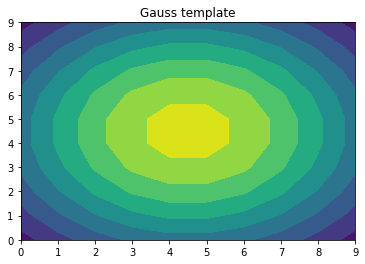

"\nfor calibIm in allCalibIms:\n    print(datetime.now())\n    ori, dist = calibIm.split('.tiff')[0].split('_')[-2], calibIm.split('.tiff')[0].split('_')[-1]\n    print(ori, dist)    \n    coords, scores, matchImages = runFindCorr(template_loc, calibIm, thresh=0.95)\n    store_output_dict = {}\n    store_output_dict['Coordinates'] = coords\n    store_output_dict['CorrMtx'] = scores\n    pickleFname, _ = storeAsPickle(fname = 'Data\\'+str(ori)+'_'+str(dist)+'.p', data = store_output_dict)\n    print(datetime.now())\n# "

In [2]:
template_loc = "gauss2D.png"
imLocCom = "E:\\CloudSync\\Mega\\Jobs\\Jordan\\DepthEstimation\\calibrationImage\\cal_image_"

gauss2D = genGausTemplate()
cv2.imwrite(template_loc, gauss2D)
plt.title("Gauss template")
plt.contourf(gauss2D)
plt.show()

#Run and save points detected from calibrated image
'''
for calibIm in allCalibIms:
    print(datetime.now())
    ori, dist = calibIm.split('.tiff')[0].split('_')[-2], calibIm.split('.tiff')[0].split('_')[-1]
    print(ori, dist)    
    coords, scores, matchImages = runFindCorr(template_loc, calibIm, thresh=0.95)
    store_output_dict = {}
    store_output_dict['Coordinates'] = coords
    store_output_dict['CorrMtx'] = scores
    pickleFname, _ = storeAsPickle(fname = 'Data\\'+str(ori)+'_'+str(dist)+'.p', data = store_output_dict)
    print(datetime.now())
# '''

In [3]:
'''
for ori in orientations:
    for dist in distFromCam:
        #Get image points
        XYs = findClusterCenters(coordDF = getCoordDF(ori = ori, dist = dist), display = False)
        #Get realworld points, object points
        XYDs = getObjectPoints(r_no = 17, c_no = 21, spacing = 50, depth = dist)
# '''

'\nfor ori in orientations:\n    for dist in distFromCam:\n        #Get image points\n        XYs = findClusterCenters(coordDF = getCoordDF(ori = ori, dist = dist), display = False)\n        #Get realworld points, object points\n        XYDs = getObjectPoints(r_no = 17, c_no = 21, spacing = 50, depth = dist)\n# '

In [4]:
for dist in distFromCam:
    print(datetime.now())
    print(dist)
    l_im_loc = imLocCom+"left_"+str(dist)+".tiff"
    r_im_loc = imLocCom+"right_"+str(dist)+".tiff"
    l_img = cv2.imread(l_im_loc)
    r_img = cv2.imread(r_im_loc)    
    l_XY = findClusterCenters(coordDF = getCoordDF(ori = 'right', dist = dist), display = False)
    r_XY = findClusterCenters(coordDF = getCoordDF(ori = 'right', dist = dist), display = False)
    XYD = getObjectPoints(r_no = 17, c_no = 21, spacing = 50, depth = dist)
    l_XY = np.array(l_XY)
    XYD = np.array(XYD)

    imh, imw = l_img.shape[0], l_img.shape[1]
    l_ret, l_mtx, l_dist, l_rvecs, l_tvecs = cv2.calibrateCamera(XYD, l_XY, (imh, imw),None,None)
    print('Done')
    r_ret, r_mtx, r_dist, r_rvecs, r_tvecs = cv2.calibrateCamera(XYD, r_XY, (imh, imw),None,None)
    print(l_ret, l_mtx, l_dist, l_rvecs, l_tvecs, r_ret, r_mtx, r_dist, r_rvecs, r_tvecs)
    print('_______________________________________________________________________________')
    (_, _, _, _, _, rotationMatrix, translationVector, _, _) = cv2.stereoCalibrate(XYD, l_XY, r_XY,
        l_mtx, l_dist,
        r_mtx, r_dist,
        (imh, imw), None, None, None, None,
        cv2.CALIB_FIX_INTRINSIC, TERMINATION_CRITERIA)
    print(_, _, _, _, _, rotationMatrix, translationVector, _, _) 


2020-11-10 19:34:33.736109
2000
